### 목차
- 백트래킹 응용
- 트리 개요
- 이진 트리
- 이진 탐색 트리(BST)
- 힙 트리(Heap)

# 백트래킹 응용
- 단어를 달달 외울 필요X 개념만 알고 있으면 됨
- 여러가지 선택지(옵션)들이 존재하는 상황에서 한가지를 선택한다.
- 선택이 이루어지면 새로운 선택지들의 집합이 생성된다.
- 이런 선택을 반복하면서 최종 상태에 도달한다
  - 올바른 선택을 계속하면 목표 상태에 도달한다.
- 트리 형태로 나오는 것이지 트리는 아니다!

### 당첨 리프노드 찾기
- 루트에서 갈 수 있는 노드를 선택한다.
- 꽝 노드까지 도달하면 최근의 선택으로 되돌아와서 다시 시작한다.
- 더이상의 선택지가 없다면 이전의 선택지로 돌아가서 다른 선택을 한다.
- 루트까지 돌아갔을 경우 더 이상 선택지가 없다면 답이 없다

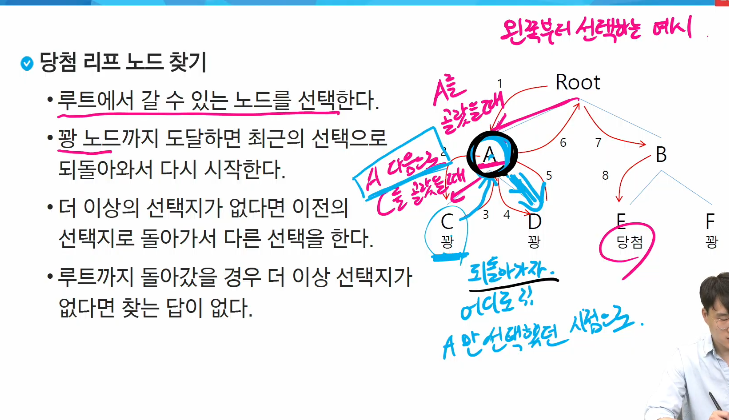

### 백트래킹과 깊이우선탐색(DFS)의 차이
- 어떤 노드에서 출발하는 경로가 해결책으로 이어질 것 같지 않으면 더이상 그 경로를 따라가지 않음으로써 시도의 횟수를 줄임(Prunning : 가지치기)
- 깊이 우선 탐색이 모든 경로를 추적하는데 비해 백트래킹은 불필요한 경로를 조기에 차단.
- 깊이우선탐색을 가하기에는 경우의 수가 너무나 많음. 즉, N!(N^N) 가지 경우의 수를 가진 문제에 대해 깊이 우선 탐색을 가하면 당연히 처리 불가능한 문제에 백트래킹 적용
- 백트래킹 알고리즘을 적용하면 일반적으로 경우의 수가 줄어들지만 이 역시 최악의 경우에는 여전히 지수함수 시간(Exponential Time)을 요하므로 처리 불가능 : 그러므로 대부분의 백트래킹 문제는 N 값이 크지 않음

In [ ]:
# 백트래킹 기본 구조

# 중복 순열

arr = [i for i in range(1, 4)]
visited = [0] * 3


def dfs(level):
    if level == len(arr):
        print(*visited)
        return

    for i in range(len(arr)):
        # 가지치기 : 중복된 숫자 제거
        # if arr[i] in visited:
        #     continue

        visited[level] = arr[i]
        dfs(level + 1)
        # visited[level] = 0


dfs(0)

# N - Queen 문제
- 퀸은 상하좌우 대각선까지 모든 방향(8방향)으로 공격이 가능하다
- 퀸들이 서로 위협하지 않도록 n개의 퀸을 배치하는 문제
- 일반적인 체스판은 8x8
- 아무것도 고려하지 않고 8개를 배치하는 경우의 수 64C8 (44억정도) : 64칸 중 8칸 고르기
- 한 줄에는 2개 이상 배치를 못할 때 (가로 또는 세로 한 줄만) : 8^8 (1600만)
- 가로, 세로 한 줄에는 2개 이상 배치 못할 때 : 8! (대략 4만번)
- O(N!)이면 11이상(11이면 4천만)이면 가지치기가 반 이상의 경우의 수를 없앨 수 있다
  - 가지치기, DP(반복을 재계산), 그리디 규칙 등을 적용해서 조정할 수 있다(고난이도 스킬)
  - 그래서 대부분 11 이하로 나온다.
- 아무것도 고려하지 않고 8개를 배치하는 경우의 수는 44억개 정도이지만 실제 해는 92개뿐이다

### 4-Queens 문제로 축소해서 보기
- 같은 행에 위치할 수 없다
- 모든 경우의 수 : 4x4x4x4 = 256
- 루트 노드에서 리프 노드까지 경로는 해답후보가 되는데, 깊이 우선 검색을 하여 그 해답후보 중에서 해답을 찾을 수 있다.
- 그러나 이 방법을 사용하면 해답이 될 가능성이 전혀 없는 노드의 후손 노드들도 모두 검색해야 하므로 비효율적이다 => 가로 뿐만 아니라 세로 열도 겹치면 안됨! => 세로열 가지치기 필요!

### 백트래킹 기법
- 어떤 노드의 유망성을 점검한 후에 유망하지 않다고 결정되면 그 노드의 부모로 되돌아가 다음 자식 노드로 감
- 어떤 노드를 방문하였을 때 그 노드를 포함한 경로가 해답이 될 수 없으면 그 노드는 유망하지 않다고 하며, 반대로 해답의 가능성이 있으면 유망하다고 한다.
- 가지치기 : 유망하지 않은 노드가 포함되는 경로는 더이상 고려하지 않는다.

### 백트래킹 절차
1. 상태공간 트리의 깊이우선검색을 실시한다.
2. 각 노드가 유망한지를 점검한다.
  - 설계 단계에서 유망하지 않은 경우를 생각하고 구현해야 한다.(반례도 생각해보기)
3. 만일 그 노드가 유망하지 않으면, 그 노드의 부모 노드로 돌아가서 검색을 계속한다.

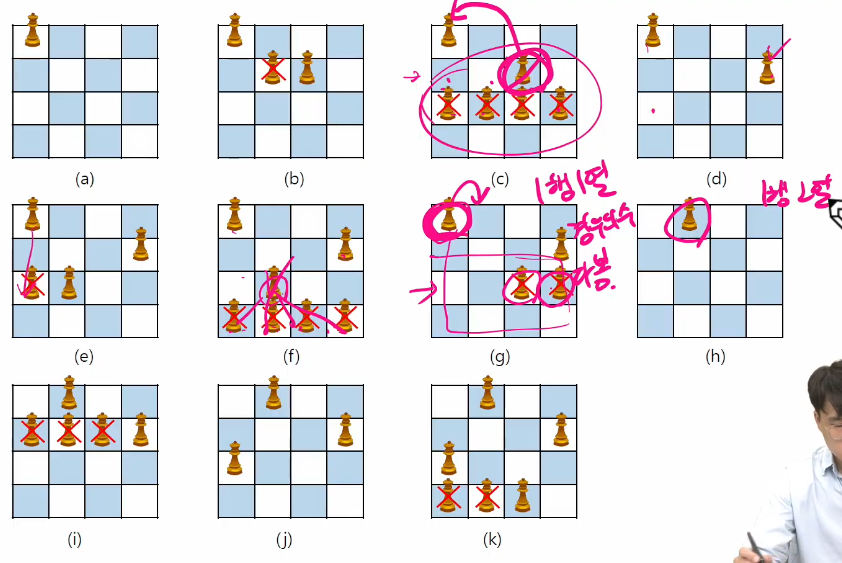  

![8-퀸 상대공간트리.PNG](<attachment:8-퀸 상대공간트리.PNG>)  


- 순수한 깊이우선검색은 155노드가 들지만, 백트래킹은 27노드만 필요하다

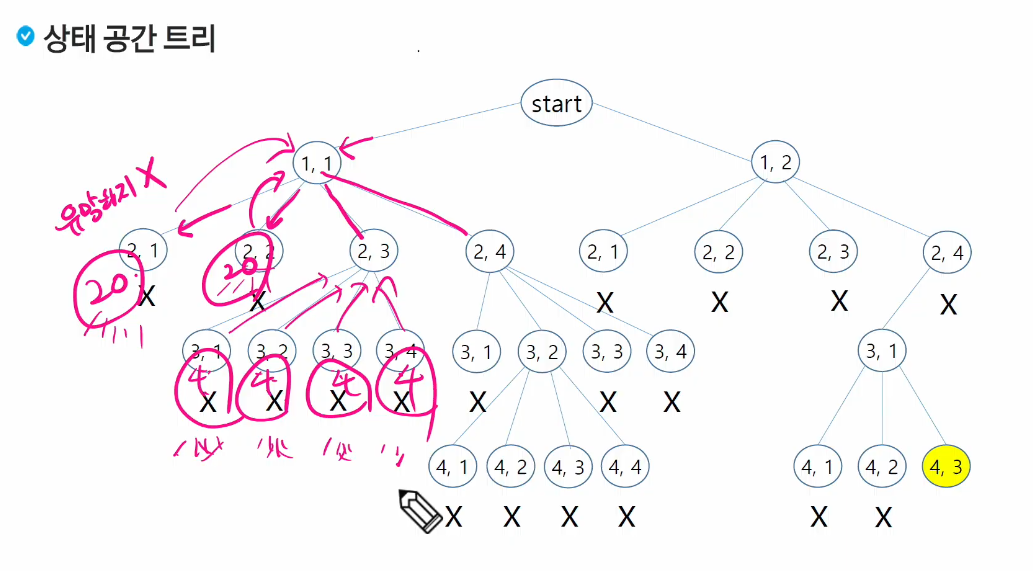

In [ ]:
# 2차원 N-quuen
# 가로줄, 세로줄, 우하 대각선 , 좌하 대각선 확인 필요
# 2차원 visit 활용!

def check(row, col):
    # 현재 열에 퀸이 있는지 확인(가로줄 확인)
    for i in range(row):
        if visited[i][col] == 1:
            return False

    # 왼쪽 대각선 확인
    i, j = row - 1, col - 1
    while i >= 0 and j >= 0:
        if visited[i][j] == 1:
            return False
        i -= 1
        j -= 1

    # 오른쪽 대각선 확인
    i, j = row - 1, col + 1
    while i >= 0 and j < N:
        if visited[i][j] == 1:
            return False
        i -= 1
        j += 1

    # for 문으로 나타내는 법(참고용)
    # zip(두개의 리스트를 쌍으로 묶어주는 것)을 사용하면 가독성은 좋지만 생각보다 느림!
    # # 왼쪽 대각선 확인
    # for i, j in zip(range(row - 1, -1, -1), range(col - 1, -1, -1)):
    #     if visited[i][j] == 1:
    #         return False
    #
    # # 오른쪽 대각선 확인
    # for i, j in zip(range(row - 1, -1, -1), range(col + 1, N)):
    #     if visited[i][j] == 1:
    #         return False

    return True


def dfs(row):
    global cnt

    if row == N:        # 퀸들을 모두 배치한 경우
        cnt += 1
        return

    for col in range(N):
        if check(row, col):                 # 유망한지 검사
            visited[row][col] = 1           # 방문 처리
            dfs(row + 1)                    # 다음 행
            visited[row][col] = 0           # Backtracking


T = int(input())
for tc in range(1, T + 1):
    N = int(input())
    visited = [[0] * N for _ in range(N)]
    cnt = 0

    dfs(0)
    print(f'#{tc} {cnt}')



In [ ]:
# 1차원 N-Queen
# visited[row][col] = 1     # row 행의 col 자리에 배치했다는 뜻
# -> visited[row] = col
# 대각선은 열과 행의 차이로 본다

def check(row):
    for col in range(row):
        if visited[row] == visited[col]:
            return False

        # 열과 행의 차이가 같다 == 현재 col 의 좌우 대각선이다
        if abs(visited[row] - visited[col]) == abs(row - col):
            return False

    return True


def dfs(row):
    global cnt

    if row == N:
        cnt += 1
        return

    for col in range(N):
        visited[row] = col
        if not check(row):
            continue

        dfs(row + 1)


T = int(input())
for tc in range(1, T + 1):
    N = int(input())
    visited = [0] * N
    cnt = 0

    dfs(0)
    print(f'#{tc} {cnt}')

In [ ]:
# 교수님 N-Queen
# 순열을 만드는 방법
N = 4
visit = [0] * N         # 순열에서 중복 체크
cols = [0] * N         # 열 값을 기록(순서를 기록)
# cols[0] <- 0번행에서의 열의 위치 visit[row] = col 이런느낌


# 현재 (r,c)에 퀸을 두는 선택을 함
# cols[0...k-1] 까지 이전 퀸에 대한 선택이 저장되어 있음
# 대각선을 체크하려고 함
def notPossible(cols,r,c) :
    # 0번부터 r-1번 행까지 열의 위치
    for i in range(0,r) :
        # (i,cols[i]) 좌표와 (r,c)가 대각인지 체크
        if (r-i) == abs(c-cols[i]) :            #어차피 0~r-1 까지라서 절대값 안씌워도 됨
            return True         #대각에 있단 뜻



def nQueen(k) :
    if k == N :
        print(cols)
    else :
        for i in range(N) :
            if visit[i] : continue
            # k번 행의 열을 위치를 i로 선택
            if notPossible(cols,k,i) : continue
            visit[i] = 1
            cols[k] = i
            nQueen(k+1)
            visit[i] = 0

nQueen(0)


In [ ]:
# 연습문제2

# 1,2,3,4,5,6,7,8,9,10}의 powerset 중 원소의 합이 10인 부분집합을 모두 출력하시오.
arr = [i for i in range(1, 11)]
visited = []


def dfs(level, sum):
    if level == len(arr):
        return

    if sum > 10:
        return

    if sum == 10:
        print(*visited)
        return

    for i in range(len(arr)):
        if arr[i] in visited:
            continue

        visited.append(arr[i])
        dfs(level + 1, sum + arr[i])
        visited.pop()


dfs(0, 0)



In [ ]:
# 연습문제 2 라이브에서는 이걸로 봄

# 1,2,3,4,5,6,7,8,9,10}의 powerset 중 원소의 합이 10인 부분집합을 모두 출력하시오.
# 단, 순서에 따른 중복을 제거하세요
arr = [i for i in range(1, 11)]
visited = []
path = []

# 버전1
def dfs(level, sum, idx):
    # <기저조건 파악> 문제에서 발견하기 힘든 경우가 많으니 유심히 보기
    # 가지치기 : 합이 10이면 종료
    if sum == 10:
        print(*visited)
        return

    # 가지치기 : 10이상의 숫자면 볼 필요 없음
    if sum > 10:
        return

    # <후보군> : 방문처리, 예시(~때는 가지 않는다)를 통해 확인할 수 있음, 중복을 보지 않는다면 파라미터로 후보군 없애주기
    for i in range(idx, len(arr)):      # idx : 출발지 / 현재수보다 작은 수들은 이전(작은수) 의 경우에서 이미 고려됐으므로 또 볼 필요 없음 (1234) = (4321)
        # 가지치기 : 이미 사용한 숫자라면 생략
        if arr[i] in visited:
            continue

        visited.append(arr[i])
        dfs(level + 1, sum + arr[i], i)
        visited.pop()


# 버전2
# 트리 구조처럼 사용하면 훨씬 쉽고 빠르다(이진트리구조)
# 선택하는 경우, 선택하지 않는 경우로 나뉘는 문제
# 이전 선택으로 되돌아가지 않아도 되는 문제

def dfs2(level, sum):
    if sum > 10:
        return

    if sum == 10:
        print(*path)
        return

    # 모두 선택하지 않으면 합이 10이 넘지 못하므로 (모두 False 라는 반례에 대한 해답)
    # 기저조건 추가
    if level == len(arr):
        return

    # 선택하는 경우
    path.append(arr[level])     # 경로 저장용
    dfs2(level + 1, sum + arr[level])
    path.pop()

    # 현재 숫자를 선택하지 않는 경우
    dfs2(level + 1, sum)


# dfs(0, 0, 0)
dfs2(0, 0)

# 트리
- 이전과 겹치는게 많음! 복습느낌~
- 트리는 그래프의 확장 단계
- 트리는 싸이클이 없는 무향 연결 그래프이다.(무향 = 양방향 = 방향이 없다)
  - 두 노드(or 정점) 사이에는 유일한 경로가 존재한다. = 싸이클이 없다 = 형제끼리 연결되는 것X = 계층구조
  - 각 노드는 최대 하나의 부모 노드가 존재할 수 있다. = 계층구조
  - 각 노드는 자식 노드가 없거나 하나 이상이 존재할 수 있다.
- 비선형 구조
  - 원소들 간에 1:n 관계를 가지는 자료 구조
  - 원소들 간에 계층관계를 가지는 계층형 자료구조
  - 루트를 어떤걸로 하느냐에 따라 하나의 그래프로 여러개의 트리를 만들 수 있다

  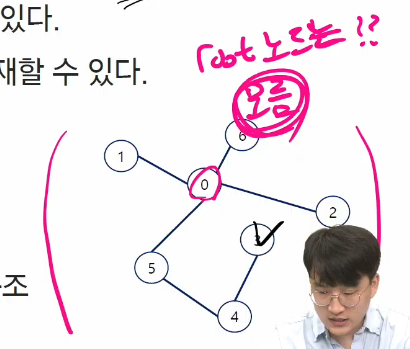

- 한 개 이상의 노드로 이루어진 유한 집합이며 다음 조건을 만족한다
  1. 노드 중 부모가 없는 노드를 루트 (root)라 한다.
  2. 나머지 노드들은 n (>=0)개의 분리 집합 T1,... , TN으로 분리될 수 있다.
- 이 들 T1...,TN은 각각 하나의 트리가 되며(재귀적 정의) 루트의 서브트리라고 한다.


### 트리 용어
- 노드(node) : 트리의 원소이고 정점(vertex)이라고도 한다.
- 간선(edge) : 노드를 연결하는 선. 부모 노드와 자식 노드를 연결
- 루트 노드(root node) 트리의 시작 노드
- 형제 노드(sibiling node) : 같은 부모 노드의 자식 노드들
- 조상 노드 : 간선을 따라 루트 노드까지 이르는 경로에 있는 모든 노드들
- 서브 트리(subtree) : 부모 노드와 연결된 간선을 끊었을 때 생성되는 트리
- 자손 노드 : 서브 트리에 있는 하위 레벨의 노드들
- 차수(degree)
  - 노드의 차수 : 노드에 연결된 자식 논드의 수
  - 트리의 차수 : 트리에 있는 노드의 차수 중에서 가장 큰 값
  - 단말 노드(리프 노트) : 차수가 0인 노드. 자식 노드가 없는 노드
- 높이
  - 노드의 높이 : 루트에서 노드에 이르는 간선의 수. 노드의 레벨 
    - 루트는 높이 0에서부터 시작함
  - 트리의 높이 : 트리에 있는 노드의 높이 중에서 가장 큰 값. 최대 레벨

### 트리 정리
- 트리 = 그래프 + 조건
- 문제풀이 할 때 트리의 저장 : 인접 리스트나 딕셔너리 활용
  - ex) graph[A] = [B,C,D]

# 이진 트리
- 모든 노드들이 최대 2개의 서브 트리를 갖는 특별한 형태의 트리
- 각 노드가 자식 노드를 최대 2개까지만 가질 수 있는 트리
  - 왼쪽 자식 노드 / 오른쪽 자식 노드  

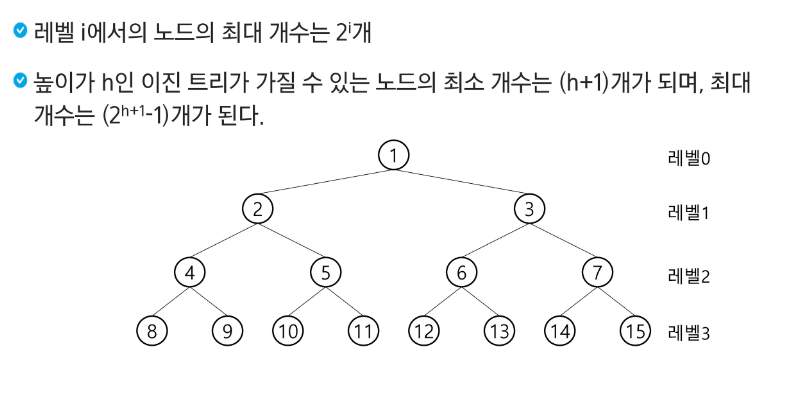  
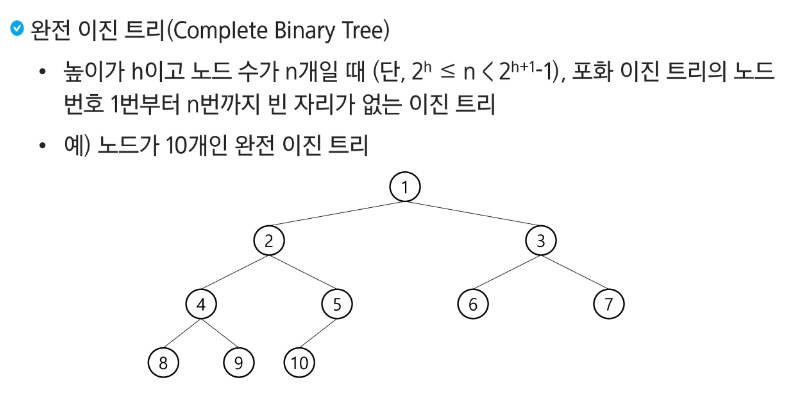  
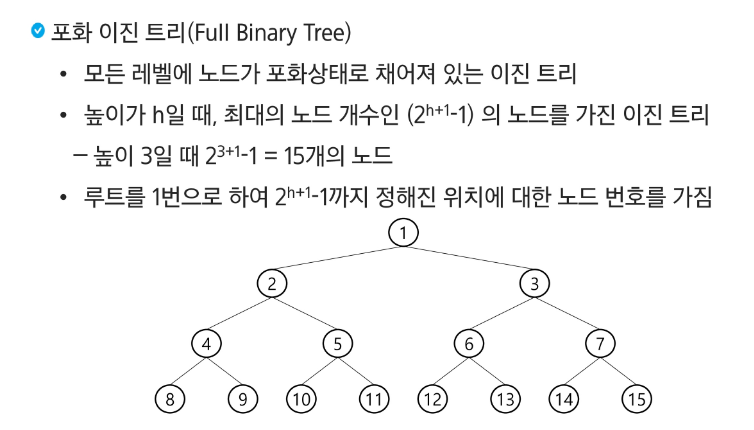  
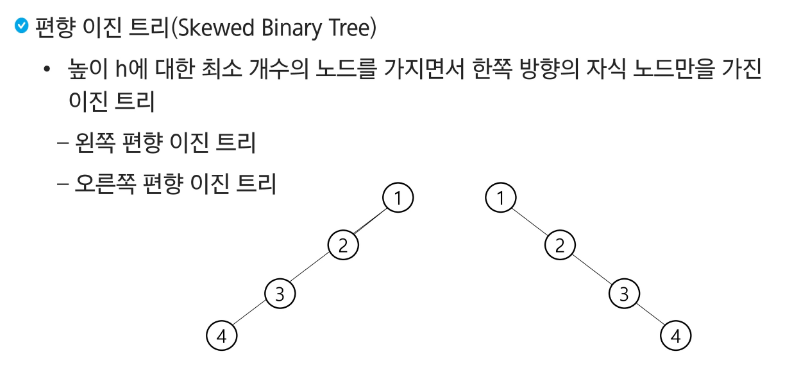  

- 높이를 구하는 이유는 시간복잡다 계산을 위해! 
- 이 3개에 속하지 않으면 그냥 이진트리임

## 이진트리 순회
- 순회 : 트리의 각 노드를 중복되지 않게 체계적으로 전부 방문하는 것
- 순회 방법
    - 전위 순회 : 부모 노드 → 왼쪽 자식 노드 → 오른쪽 자식 노드
    - 중위 순회 : 왼쪽 자식노드 → 부모 노드 → 오른쪽 자식 노드
    - 후위 순회 : 왼쪽 자식 노드 → 오른쪽 자식 노드 → 부모 노드  

### 배열을 이용한 이진트리 표현
- 이진 트리에 각 노드 번호를 미리 알 수 있음 -> 리스트를 활용한
- 왼쪽은 v*2, 오른쪽은 v*2+1
- 배열을 이용한 이진트리 표현의 단점
  - 편향 이진트리의 경우에 사용하지 않는 배열 원소에 대한 메모리 공간 낭비 발생
  - 트리의 중간에 새로운 노드를 삽입하거나 기존의 노드를 삭제할 경우 배열의 크기 변경 어려워 비효율적임
    - 삭제가 발생하는 문제에서는 1차원 리스트 사용하지 말기! 인접리스트나 연결리스트 활용
- 계층구조이기 때문에 보통 위에서 아래로 탐색함

In [ ]:
# 트리저장 개발용

arr = [1, 2, 1, 3, 2, 4, 3, 5, 3, 6, 4, 7, 5, 8, 5, 9, 6, 10, 6, 11, 7, 12, 11, 13]


class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

    def insert(self, child):
        if(not self.left):
            self.left = child
            return
        if(not self.right):
            self.right = child
            return
        return

    def preorder(self):
        if self != None:
            print(self.value, end=' ')
            if self.left:
                self.left.preorder()
            if self.right:
                self.right.preorder()

    # 중위 순회
    def inorder(self):
        if self != None:
            if self.left:
                self.left.inorder()
            print(self.value, end=' ')
            if self.right:
                self.right.inorder()

    # 후위 순회
    def postorder(self):
        if self != None:
            if self.left:
                self.left.postorder()
            if self.right:
                self.right.postorder()
            print(self.value, end=' ')

# 이진 트리 만들기
nodes = [TreeNode(i) for i in range(0, 14)]
for i in range(0, len(arr), 2):
    parentNode = arr[i]
    childNode = arr[i + 1]
    nodes[parentNode].insert(nodes[childNode])

nodes[1].preorder()
print()
nodes[1].inorder()
print()
nodes[1].postorder()

In [ ]:
# 문제풀이용

arr = [1, 2, 1, 3, 2, 4, 3, 5, 3, 6, 4, 7, 5, 8, 5, 9, 6, 10, 6, 11, 7, 12, 11, 13]


class TreeNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

    def insert(self, child):
        if(not self.left):
            self.left = child
            return
        if(not self.right):
            self.right = child
            return
        return

    def preorder(self):
        if self != None:
            print(self.value, end=' ')
            if self.left:
                self.left.preorder()
            if self.right:
                self.right.preorder()

    # 중위 순회
    def inorder(self):
        if self != None:
            if self.left:
                self.left.inorder()
            print(self.value, end=' ')
            if self.right:
                self.right.inorder()

    # 후위 순회
    def postorder(self):
        if self != None:
            if self.left:
                self.left.postorder()
            if self.right:
                self.right.postorder()
            print(self.value, end=' ')

# 이진 트리 만들기
nodes = [TreeNode(i) for i in range(0, 14)]
for i in range(0, len(arr), 2):
    parentNode = arr[i]
    childNode = arr[i + 1]
    nodes[parentNode].insert(nodes[childNode])

nodes[1].preorder()
print()
nodes[1].inorder()
print()
nodes[1].postorder()

## 이진탐색트리(BST)
- 그림만 제대로 그릴 줄 알면됨! 구현은 천천히 연습하면 됨
- 탐색 작업을 효율적으로 하기 위한 자료 구조
- 작으면 왼쪽 크면 오른쪽에 삽입 => logN의 탐색 속도(빠름)
- 모든 원소는 서로 다른 유일한 키를 갖는다
- 왼쪽 서브트리 < 루트 노드 < 오른쪽 서브 트리
- 왼쪽 서브트리와 오른쪽 서브트리도 이진탐색트리다.
- 중위순회하면 오름차순으로 정렬된 값을 얻을 수 있다


### 탐색 연산
- 루트에서 탐색 시작
- 탐색할 키 값 x를 루트 노드의 키 값 k와 비교
- x == k : 탐색 성공
- x < k : 루트 노드의 왼쪽 서브 트리에 대해서 탐색 연산 수행
- x > k : 루트 노드의 오른쪽 서브 트리에 대해서 탐색 연산 수행
- 트리의 높이만큼 수행되기 때문에 logN
- 서브 트리에 대해서 순환적으로 탐색 연산을 반복한다.
- 탐색 수행할 서브 트리가 없으면 탐색 실패

### 삽입 연산
- 내 위치를 찾는 과정 = 높이만큼 시간 발생(O(logN))
1. 먼저 탐색 연산을 수행
  - 삽입할 원소와 같은 원소가 트리에 있으면 삽입할 수 없으므로, 같은 원소가 트리에 있는지 탐색하여 확인한다.
  - 탐색에서 탐색 실패가 결정되는 위치가 삽입 위치가 된다.
2. 탐색 실패한 위치에 원소를 삽입한다. 

### 삭제 연산
- 자식의 개수에 따라 다르게 나타남
- 자식이 없을 땐 그냥 삭제
- 1개일 땐 삭제하고 남은 것 연결해주기
- 2개일 땐 서브트리의 왼쪽에서 가장 큰 수 또는 우측에서 가장 작은 수를 가운데로 올리기

### 성능
- 탐색, 삽입, 삭제 시간은 트리의 높이만큼 시간이 걸린다(O(h))
- 이진트리가 균형적으로 생성되어 있는 경우 O(logN)
- 편향이진트리의 경우 O(n) (최악의 경우)


# 힙트리(Heap Tree)

- 완전이진트리에 있는 노드 중에서 키값이 가장 큰 노드나 키값이 가장 작은 노드를 찾기 위해서 만든 자료구조
- 형제끼리는 대소가 구분이 안되기 때문에 같은 값일 수 있음. 디버깅 할 때에는 index 값으로 부모 자식을 추적해봐야 함
- 최대 힙(max heap)
    - 키값이 가장 큰 노드를 찾기 위한 완전이진트리
    - 부모노드의 키값 > 자식노드의 키값
    - 루트 노드 : 키값이 가장 큰 노드
- 최소 힙(min heap)
    - 키값이 가장 작은 노드를 찾기 위한 완전이진트리
    - 부모노드의 키값 < 자식노드의 키값
    - 루트 노드 : 키값이 가장 작은 노드


### 힙 연산
- 삽입
    1. 일단 맨 뒤에 삽입
    2. 부모와 비교하여 내 위치를 찾아감(비교, swap)
    - 힙의 종류에 따라 최대값 혹은 최소값을 구할 수 있다
- 삭제
    - 루트 노드의 원소만을 삭제 할 수 있다
    - 루트 노드의 원소를 삭제하여 반환한다
    - 힙의 종류에 따라 최대값 혹은 최소값을 구할 수 있다
    - 순서
    1. 루트 노드에 마지막 노드 값 복사
    2. 마지막 노드 삭제
    3. 비교하며 자리 바꾸기(최대힙이라면 좌우 자식노드 중 더 큰값과 바꾸기)

In [ ]:
# 힙
from heapq import heappush, heappop

arr = [20, 15, 19, 4, 13, 11]

# 최소힙
min_heap = []

for el in arr:
    heappush(min_heap, el)
    print(min_heap)

print(min_heap)  # [4, 13, 11, 20, 15, 19] 출력

while len(min_heap) > 0:
    print(heappop(min_heap), end=' ')
    print(min_heap)

print()

# 최대힙
max_heap = []
for el in arr:
    heappush(max_heap, -el)

print(max_heap)  # [-20, -15, -19, -4, -13, -11] 출력

while len(max_heap) > 0:
    print(-heappop(max_heap), end=' ')